In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression


Converting txt files to csv

In [3]:
read_file = pd.read_csv (r'datatraining.txt')
read_file.to_csv (r'datatraining.csv', index=None)

In [4]:
read_file = pd.read_csv (r'datatest.txt')
read_file.to_csv (r'datatest.csv', index=None)

In [5]:
read_file = pd.read_csv (r'datatest2.txt')
read_file.to_csv (r'datatest2.csv', index=None)

In [6]:
df=pd.read_csv('datatest.csv')
df1=pd.read_csv('datatraining.csv')
df2=pd.read_csv('datatest2.csv')

Combining those csv files into one dataframe

In [7]:
df3=pd.concat([df,df1,df2], ignore_index=True)

Converted Occupancy from binary 1 and 0 to Yes and No in df4 but kept df3 because the binary may be easier for analysis

In [8]:
df4=df3.copy()

In [9]:
df4['Occupancy'] = df4['Occupancy'].map(lambda x: 'yes' if x == 1 else 'no')
df4['Occupancy'] = df4['Occupancy'].astype(str)

In [10]:
df3.Occupancy.groupby(df3.Occupancy).count()

Occupancy
0    15810
1     4750
Name: Occupancy, dtype: int64

In [11]:
df4.Occupancy.groupby(df4.Occupancy).count()

Occupancy
no     15810
yes     4750
Name: Occupancy, dtype: int64

In [12]:
df3

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [13]:
df4

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,yes
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,yes
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,yes
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,yes
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,yes
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,yes
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,yes
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,yes
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,yes


In [14]:
df3.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
15086,2015-02-14 14:06:00,20.29,35.590,37.00,504.250000,0.005246,0
12609,2015-02-12 20:49:00,21.23,27.360,0.00,563.000000,0.004266,0
12826,2015-02-13 00:26:00,21.00,25.660,0.00,581.666667,0.003943,0
2641,2015-02-04 10:20:00,24.00,26.365,774.50,1182.000000,0.004869,1
14667,2015-02-14 07:07:00,19.60,38.700,0.00,509.000000,0.005467,0
4926,2015-02-06 07:32:00,20.20,18.500,0.00,427.500000,0.002701,0
5254,2015-02-06 13:00:00,21.60,20.000,53.00,739.250000,0.003185,0
11953,2015-02-12 09:53:00,22.89,24.245,625.75,1040.250000,0.004183,1
8961,2015-02-09 02:47:00,19.39,26.650,0.00,468.000000,0.003706,0
6941,2015-02-07 17:06:59,20.60,20.700,0.00,439.000000,0.003099,0


In [15]:
df4.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
5909,2015-02-06 23:55:00,19.890000,18.790000,0.000000,441.50,0.002691,no
1673,2015-02-03 18:11:59,22.600000,30.100000,419.000000,1204.75,0.005110,yes
11217,2015-02-11 21:36:59,20.790000,29.330000,0.000000,488.00,0.004453,no
5769,2015-02-06 21:35:00,20.200000,18.945000,0.000000,440.50,0.002766,no
6078,2015-02-07 02:44:00,19.890000,19.000000,0.000000,441.00,0.002721,no
19430,2015-02-17 14:30:00,22.000000,34.590000,459.000000,1316.50,0.005667,yes
19670,2015-02-17 18:29:59,21.890000,34.290000,0.000000,1525.00,0.005579,no
15611,2015-02-14 22:51:00,19.945000,35.845000,0.000000,541.50,0.005171,no
13313,2015-02-13 08:32:59,21.166667,25.293333,23.666667,520.00,0.003927,no
12939,2015-02-13 02:19:00,21.000000,25.445000,0.000000,579.00,0.003910,no


In [16]:
df3.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Checking for missing data

In [17]:
df3.count()

date             20560
Temperature      20560
Humidity         20560
Light            20560
CO2              20560
HumidityRatio    20560
Occupancy        20560
dtype: int64

In [18]:
df4.count()

date             20560
Temperature      20560
Humidity         20560
Light            20560
CO2              20560
HumidityRatio    20560
Occupancy        20560
dtype: int64

In [19]:
len(df3)

20560

Examining Relationships between variables

<AxesSubplot:>

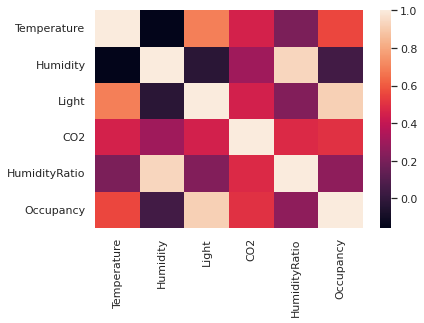

In [20]:
sns.heatmap(df3.corr())

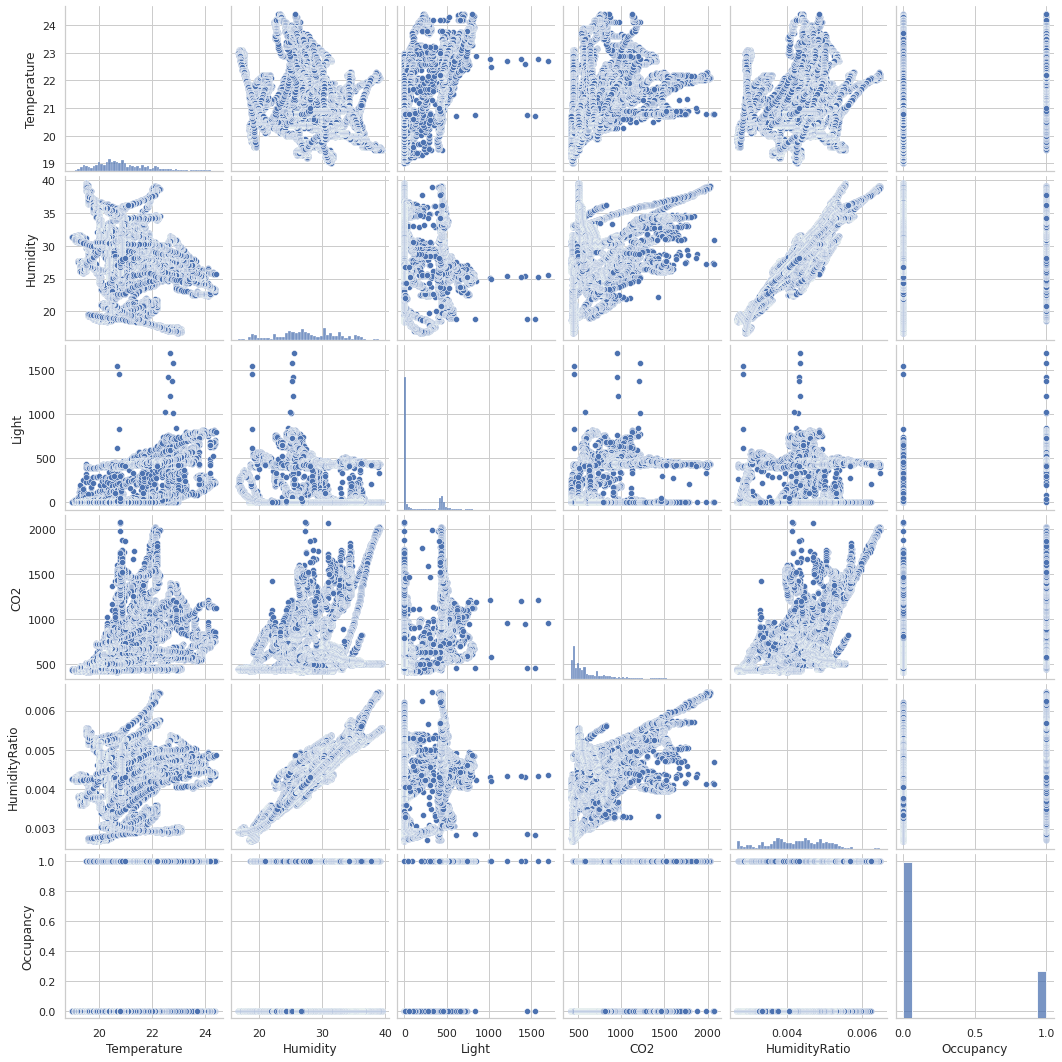

In [21]:
sns.pairplot(df3[['Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio','Occupancy']])

[Text(0.5, 1.0, 'CO2')]

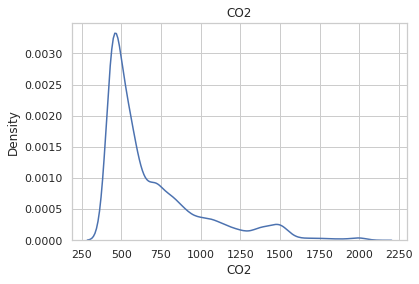

In [22]:
sns.kdeplot(df3['CO2']).set(title='CO2')

[Text(0.5, 1.0, 'Occupancy')]

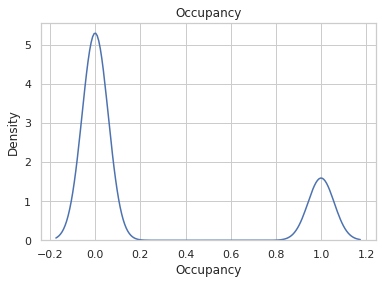

In [23]:
sns.kdeplot(df3['Occupancy']).set(title='Occupancy')

[Text(0.5, 1.0, 'Temperature')]

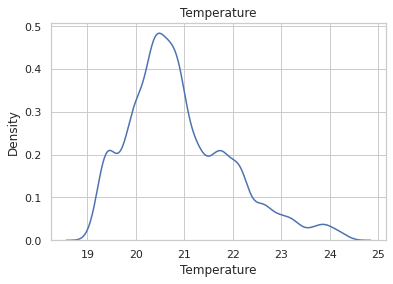

In [24]:
sns.kdeplot(df3['Temperature']).set(title='Temperature')

[Text(0.5, 1.0, 'Humidity')]

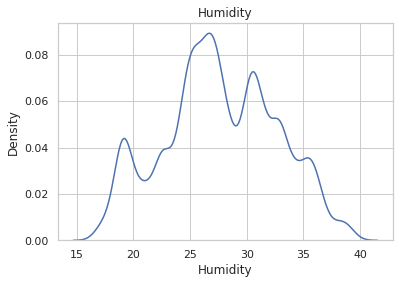

In [25]:
sns.kdeplot(df3['Humidity']).set(title='Humidity')

[Text(0.5, 1.0, 'HumidityRatio')]

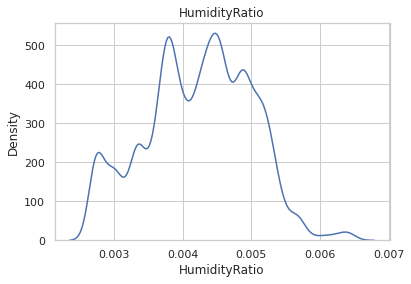

In [26]:
sns.kdeplot(df3['HumidityRatio']).set(title='HumidityRatio')

[Text(0.5, 1.0, 'Light')]

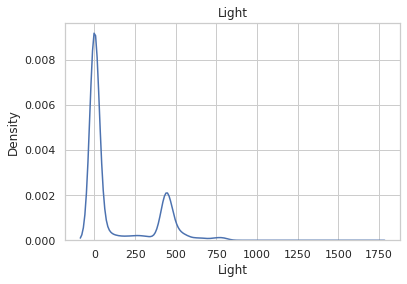

In [27]:
sns.kdeplot(df3['Light']).set(title='Light')

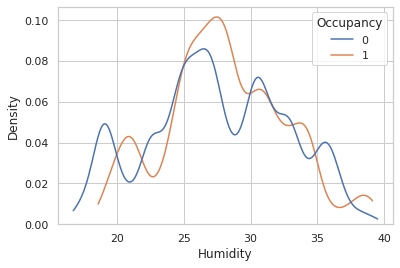

In [28]:
sns.kdeplot(data=df3, x="Humidity", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

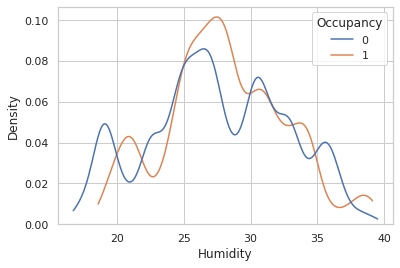

In [29]:
sns.kdeplot(data=df3, x="Humidity", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

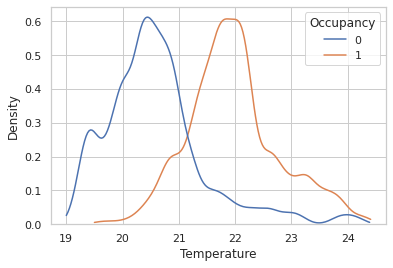

In [30]:
sns.kdeplot(data=df3, x="Temperature", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

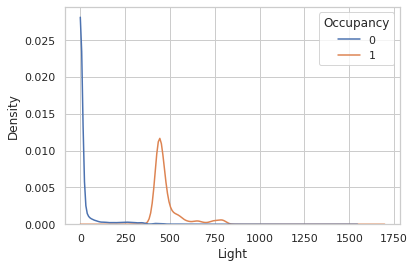

In [31]:
sns.kdeplot(data=df3, x="Light", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

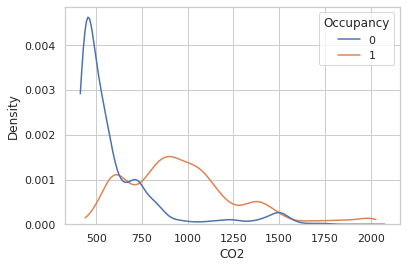

In [32]:
sns.kdeplot(data=df3, x="CO2", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

In [114]:
df5=df3[df3.columns[-6:]]

# Logistic Regression

In [55]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
data=df5

In [56]:
cat_vars=['Occupancy']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Occupancy']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [57]:
data_final=data[to_keep]
data_final.columns.values

array(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy_0', 'Occupancy_1'], dtype=object)

In [58]:
from sklearn.model_selection import train_test_split
X = df5.loc[:, df5.columns != 'Occupancy']
y = df5.loc[:, df5.columns == 'Occupancy']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Occupancy'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Occupancy']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Occupancy']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Occupancy']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Occupancy']==1])/len(os_data_X))

length of oversampled data is  22260
Number of no subscription in oversampled data 11130
Number of subscription 11130
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [59]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False]
[1 1 2 3 4]


In [60]:
cols=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'] 
X=os_data_X[cols]
y=os_data_y['Occupancy']

In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.045186
         Iterations 23
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.935    
Dependent Variable:   Occupancy          AIC:                2021.6908
Date:                 2022-04-28 08:56   BIC:                2061.7435
No. Observations:     22260              Log-Likelihood:     -1005.8  
Df Model:             4                  LL-Null:            -15429.  
Df Residuals:         22255              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       23.0000                                         
----------------------------------------------------------------------
                Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
----------------------------------------------------------------------
Temperature      -0.6535   0.0261 -25.0764 0.0000    -0.7046   -0.6024
Hu

In [62]:
cols=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       ] 
X=os_data_X[cols]
y=os_data_y['Occupancy']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.045186
         Iterations 23
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.935    
Dependent Variable:   Occupancy          AIC:                2021.6908
Date:                 2022-04-28 08:56   BIC:                2061.7435
No. Observations:     22260              Log-Likelihood:     -1005.8  
Df Model:             4                  LL-Null:            -15429.  
Df Residuals:         22255              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       23.0000                                         
----------------------------------------------------------------------
                Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
----------------------------------------------------------------------
Temperature      -0.6535   0.0261 -25.0764 0.0000    -0.7046   -0.6024
Hu

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [64]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3218   51]
 [  14 3395]]


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3269
           1       0.99      1.00      0.99      3409

    accuracy                           0.99      6678
   macro avg       0.99      0.99      0.99      6678
weighted avg       0.99      0.99      0.99      6678



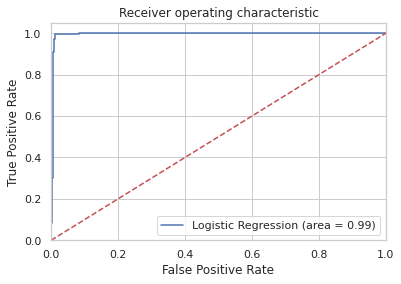

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df5, test_size=0.33)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 13775
No. of testing examples: 6785


In [69]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

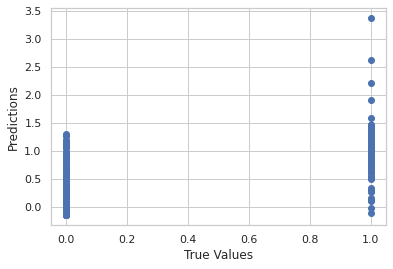

In [70]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [71]:
model.score(X_test, y_test)

0.9018456433795424

# KNN

In [80]:
X_train = np.array(df5.loc[:, df5.columns != 'Occupancy'])
y_train = np.array(df5.loc[:, df5.columns == 'Occupancy'])

In [81]:
X_test = np.array(df5.loc[:, df5.columns != 'Occupancy'])
y_test = np.array(df5.loc[:, df5.columns == 'Occupancy'])

In [82]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [83]:
neigh.fit(X_test, y_test)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [98]:
y_pred= neigh.predict(X_test)

In [85]:
neigh.score(X_test,y_test)

0.9938715953307393

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [90]:
accuracy_score(y_pred, y_test)*100

99.38715953307393

Text(0.5, 21.5, 'Predicted Label')

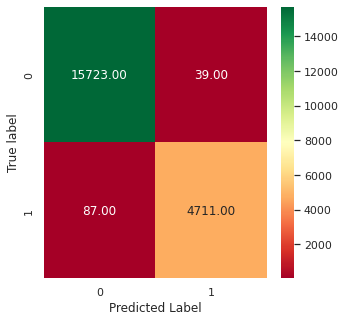

In [91]:
cm = confusion_matrix(y_pred, y_test)
fig = plt.figure(figsize=(5,5))
heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
plt.ylabel('True label')
plt.xlabel('Predicted Label')

In [95]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15762
           1       0.99      0.98      0.99      4798

    accuracy                           0.99     20560
   macro avg       0.99      0.99      0.99     20560
weighted avg       0.99      0.99      0.99     20560



In [97]:
model.score(X_test, y_test)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.8646930020326014

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9921206225680934


In [100]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1.0


In [101]:
# print the shapes of X and y
# X is our features matrix with 150 x 5 dimension
print(X.shape)
# y is our response vector with 150 x 1 dimension
print(y.shape)

(20560, 5)
(20560, 1)


In [103]:
# STEP 1: split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [104]:
print(X_train.shape)
print(X_test.shape)

(12336, 5)
(8224, 5)


In [105]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(12336, 1)
(8224, 1)


In [106]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [107]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9884484435797666


In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9901507782101168


In [109]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9901507782101168


In [110]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected

[0.986989299610895, 0.9823686770428015, 0.9896643968871596, 0.9891780155642024, 0.9901507782101168, 0.9891780155642024, 0.989421206225681, 0.989421206225681, 0.9897859922178989, 0.9896643968871596, 0.9892996108949417, 0.9892996108949417, 0.9892996108949417, 0.9892996108949417, 0.9890564202334631, 0.9890564202334631, 0.9890564202334631, 0.9891780155642024, 0.9889348249027238, 0.9889348249027238, 0.9889348249027238, 0.9889348249027238, 0.9889348249027238, 0.9889348249027238, 0.9889348249027238]


Text(0, 0.5, 'Testing Accuracy')

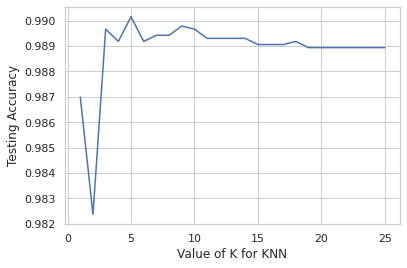

In [111]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [112]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([3, 5, 4, 2])

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[3 5 4 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
array.reshape(1,-1)